<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>6</code><b>

<b>Group Members:</b>  

1. <code>Uchenna_Chima_B00949727</code>


# 1. Dataset Information 

<h4> Dataset Name:<code> Wine Quality</code></h4>
<h4> Link to the Dataset: <code>https://archive.ics.uci.edu/dataset/186/wine+quality</code> </h4>
<h4> Dataset Description: </h4>
<code> This dataset includes samples related to the physiochemical properties of the portuguese "Vinho Verde" Red and White wines. </code>


# 2. Task Information 

<h4> Task Goal: <code>Finding the Optimal Machine Learning Model to select on a Multi-Classificaton problem</code></h4>
<h4> Task Description: </h4>
    <code>Provide a short description of the goal you are trying to achieve. What is your goal, why it's important, what features you have and how you are using it in the task, what ML models you are using and why. etc.
        
    Task: Classify the quality of wine based on physicochemical inputs (scientific data/features). In this dataset, we are given labels (sensory data) on a scale from 1-10 but I will discretize it so that 1-4 = poor quality, 4-7 = Average Quality, 8-10 = Great quality.

Models: Decision Tree,  Random Forest, Naive Bayes, SVM, K-NN 
    </code>

# 3. Task Implementation: Coding

### 3.1.1 Data Pre-Processing: Data preparation

In [29]:
#Reference [Source #1]

import numpy as np
import pandas as pd

#Data Loading
white_wine_data = pd.read_csv('wine_dataset/winequality-white.csv')
red_wine_data = pd.read_csv('wine_dataset/winequality-red.csv')

#Due to how the data was provided, i needed to split combine each data set in a specific way to achieve the appropriate data format. 
#Approach: Split by delimiter, assign appropriate column names and add new column to denote wine type.
white_wine_data_split = white_wine_data['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';',expand=True)
white_wine_data_split.columns=['fixed acidity', 'volatile acidity', "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
white_wine_data_split = white_wine_data_split.assign(wine_type=0)

red_wine_data_split = red_wine_data['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';',expand=True)
red_wine_data_split.columns=['fixed acidity', 'volatile acidity', "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
red_wine_data_split = red_wine_data_split.assign(wine_type=1)

#Concatenating Datasets together
wine_data = pd.concat([white_wine_data_split, red_wine_data_split],axis=0)


#Convert all columns types to floating points (Will be useful when applying ML algorithms later)
for column in wine_data.columns:
    wine_data[column] = wine_data[column].astype(float)
    

#Discretizing Label (1-5 = poor quality (0), 6-7 = Average Quality (1), 8-10 = Great quality (2)).
quality_discretization = lambda quality: 0.0 if (quality >= 1.0 and quality <= 5.0) else 1.0 if (quality >= 6.0  and quality <= 7.0) else 2.0 if (quality >= 8.0 and quality <= 10.0) else None

wine_data['quality'] = wine_data['quality'].apply(quality_discretization)

print("\nCombined & Discretized Wine Dataset: \n")
print(wine_data)

#wine_data.to_excel('combined_wine.xlsx')



Combined & Discretized Wine Dataset: 

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6   

### 3.1.2 Data Pre-Processing: Data Cleaning and Transformation.

In [30]:
#Reference [Source #1]
#Pre-processing (Null, Duplicates, Outlier Detection, Feature Selection, Standardization, Train/Test/Validation Splits) 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

                                                #Data Cleaning (Removing duplicated and Null Entries)
wine_data = wine_data.drop_duplicates()
print("Shape after removing duplicates:", wine_data.shape)

null_data = wine_data.isnull().sum()
print("\nChecking for Null Data:")
print(null_data)

                                            #Data Transformation (Normalization/Standardization)

#Performed Standardization on all features except (pH, Alcohol, Quality & Wine_Type). 
#Used Z-Score standardization (StandardScaler) as all features except above ones as they are continuous and don't naturally having discrete categories
#pH has categories (0-14)
#precent ranges from (0-100)

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

#convert data to numpy array for easier data transformation
wine_data_numpy = wine_data.to_numpy()

#Iterate through first 11 features and apply standard/min-max scaler
for i in range(0, len(wine_data_numpy[0])-2):
    
    scaled_feature = standard_scaler.fit_transform(wine_data_numpy[:,i].reshape(-1,1))

    if i == 8 or i == 10:
        #Scale particular feature
        scaled_feature = min_max_scaler.fit_transform(wine_data_numpy[:,i].reshape(-1,1))
        #Apply scaled result to live dataset
        wine_data_numpy[:, i] = scaled_feature.flatten()
    else:
        #Scale particular feature
        scaled_feature = standard_scaler.fit_transform(wine_data_numpy[:,i].reshape(-1,1))
        
        #Apply scaled result to live dataset
        wine_data_numpy[:, i] = scaled_feature.flatten()
    
    

#convert numpy array back to Pandas DataFrame
wine_data = pd.DataFrame(wine_data_numpy, columns=['fixed acidity', 'volatile acidity', "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality", "wine_type"])

print("\nStandardized Dataset: \n")
print(wine_data.head(3))

Shape after removing duplicates: (5320, 13)

Checking for Null Data:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

Standardized Dataset: 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.163070         -0.440639     0.282076        3.478304  -0.317143   
1      -0.693555         -0.262314     0.146154       -0.766370  -0.208624   
2       0.670550         -0.381197     0.553919        0.411472  -0.181494   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.840478              0.984535  2.180171  0.217054  -0.556721   
1            -0.900765              0.315155 -0.180525  0.449612  -0.289571   
2    

### 3.1.3 Data Pre-Processing: Outlier Removal, Over Sampling & Data Splitting(train & test sets).

In [31]:

from scipy import stats
from sklearn.model_selection import train_test_split


                                            #Outlier Detection (Applied Z-score Method for outlier detection)
#Checking for outliers using Z-Score
z_scores = np.abs(stats.zscore(wine_data))
threshold = 3

#Mask for outlier detection (True for outliers, False for inliers)
outlier_mask = (z_scores > threshold).any(axis=1)

#Filter out rows with outliers
wine_data_no_outliers = wine_data[~outlier_mask]


                                                    #Apply Random Over Sampling
over_sample_class = 2
over_sample_factor = 8

over_sample_mask = wine_data_no_outliers['quality'] == over_sample_class
class_samples_to_oversample = wine_data_no_outliers[over_sample_mask]

# Oversample the class
oversampled_data = pd.concat([class_samples_to_oversample] * over_sample_factor, ignore_index=True)

# Combine the oversampled data with the original DataFrame
df_oversampled = pd.concat([wine_data_no_outliers, oversampled_data], ignore_index=True, axis=0)

print('\n\t\t\t*** Data After removing outliers (using z-score) and applying over sampling ***\n\n', df_oversampled)


                                                    #Split dataset into train,test,validation sets

# Define 'X' and 'y' for training & testing
X = df_oversampled.drop(columns=['quality'])
y = df_oversampled['quality']

# Split the dataset into a training set test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)



print('\n\t\t\t*** Train/Test Split Results (60/40) ***')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)



			*** Data After removing outliers (using z-score) and applying over sampling ***

       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.693555         -0.262314     0.146154       -0.766370  -0.208624   
1          0.670550         -0.381197     0.553919        0.411472  -0.181494   
2         -0.011503         -0.678405     0.010232        0.767046   0.035544   
3         -0.769339         -0.143431    -1.077141        0.433695  -0.317143   
4          0.670550         -0.737846     0.757802       -0.788593  -0.344273   
...             ...               ...          ...             ...        ...   
6052       0.518982          1.164284     0.146154       -0.566359   0.523880   
6053       1.049468          0.450985     0.485959       -0.721923   0.306842   
6054      -1.299824          0.867076    -1.960633       -0.721923  -0.344273   
6055      -0.011503          0.213219    -0.057728       -0.677476  -0.018715   
6056       0.140064    

# 4. Exploratory Data Analysis: 

### 4.1 EDA

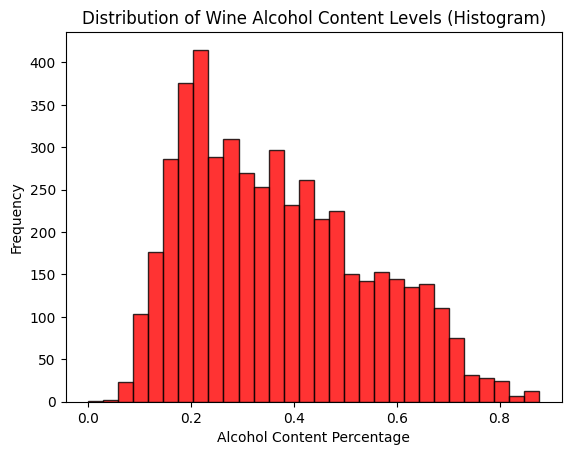

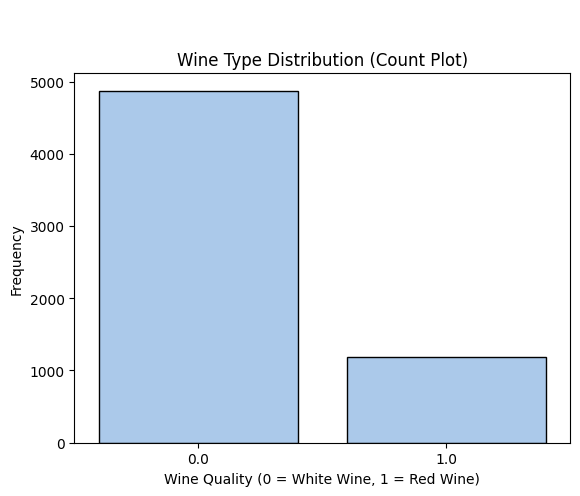

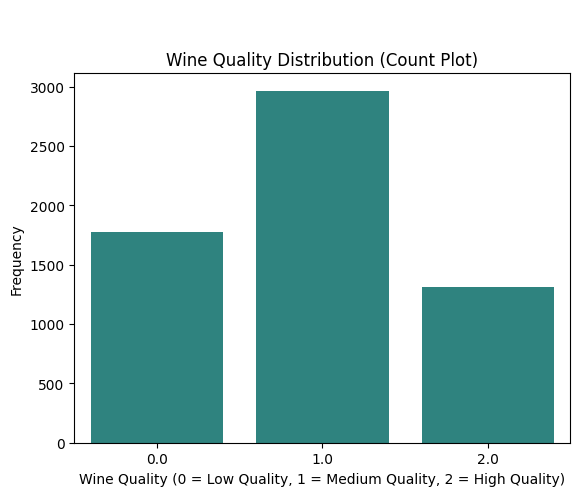

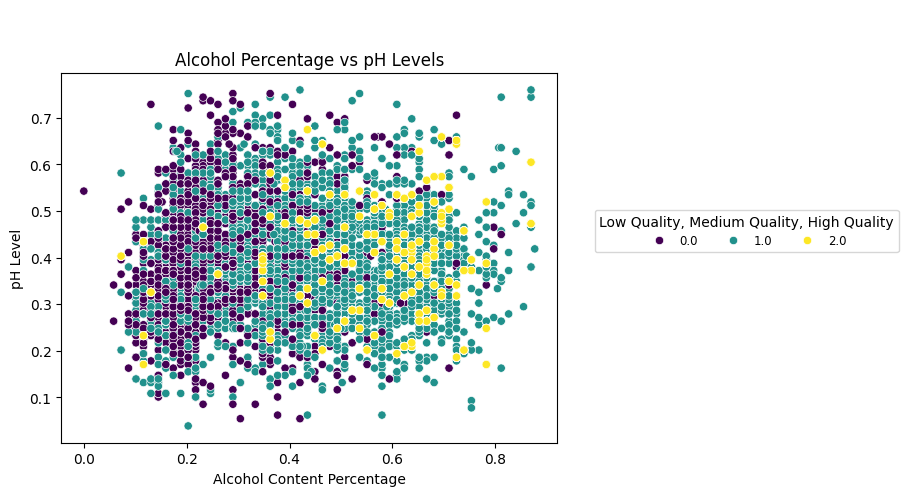

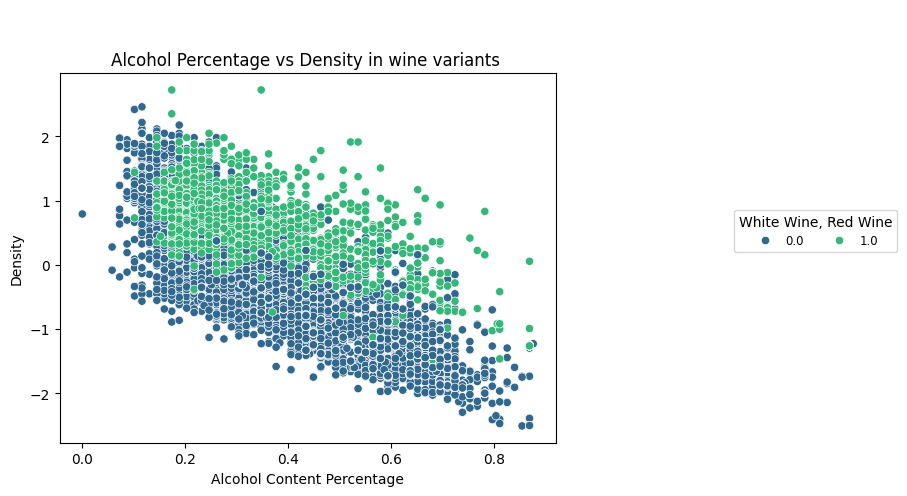

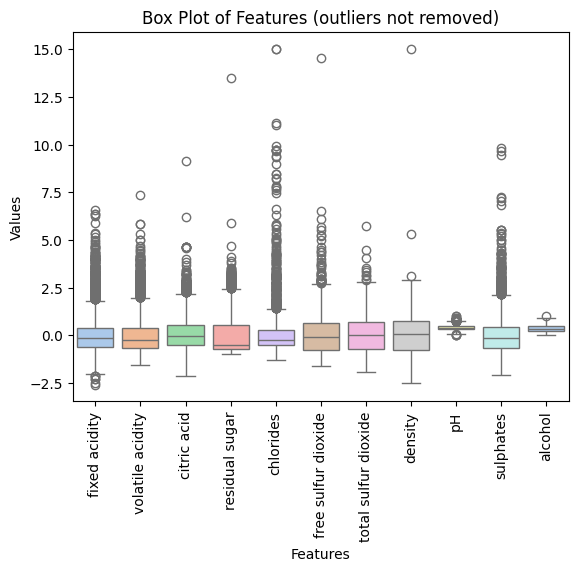

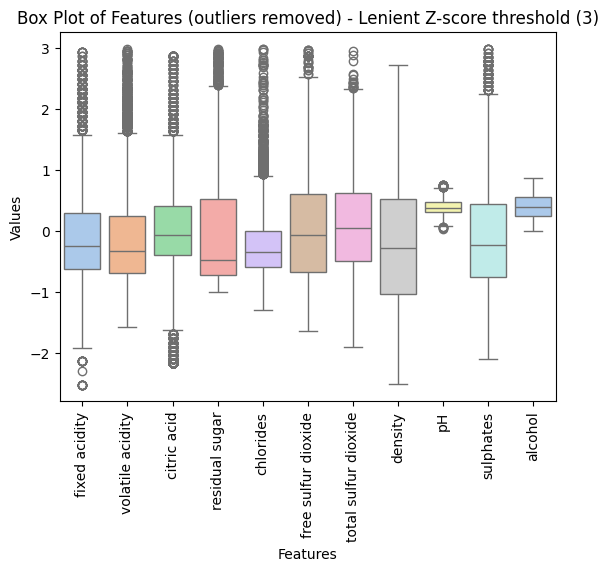

In [32]:
#Reference [Source #1]


import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

                                                            #Histograms
plt.hist(wine_data_no_outliers['alcohol'], bins=30, color='Red', alpha=0.8, edgecolor='black')

plt.xlabel('Alcohol Content Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Alcohol Content Levels (Histogram)')

# Show the histogram
plt.show()
                                                     #Count Plots

#Count Plot #1
sns.countplot(x='wine_type', data=df_oversampled, palette='pastel', hue = 0, legend=False, edgecolor='black')

#Labels
plt.xlabel('Wine Quality (0 = White Wine, 1 = Red Wine)')
plt.ylabel('Frequency')
plt.title('\n\nWine Type Distribution (Count Plot)')

plt.show()

#Count Plot #2
sns.countplot(x='quality', data=df_oversampled, palette='viridis', hue = 0, legend=False)

#Labels
plt.xlabel('Wine Quality (0 = Low Quality, 1 = Medium Quality, 2 = High Quality)')
plt.ylabel('Frequency')
plt.title('\n\nWine Quality Distribution (Count Plot)')

plt.show()


                                                        #Scatter Plots
#Scatter Plot #1
sns.scatterplot(x='alcohol', y='pH', hue='quality', data=df_oversampled, palette='viridis')

#Labels
plt.xlabel('Alcohol Content Percentage')
plt.ylabel('pH Level')
plt.legend(title='Low Quality, Medium Quality, High Quality', loc = "lower right", fontsize = "small", ncol=3, bbox_to_anchor=[1.7,0.5])
plt.title('\n\nAlcohol Percentage vs pH Levels')

plt.show()

#Scatter Plot #2
sns.scatterplot(x='alcohol', y='density', hue='wine_type', data=df_oversampled, palette='viridis')

#Labels
plt.xlabel('Alcohol Content Percentage')
plt.ylabel('Density')
plt.legend(title='White Wine, Red Wine', loc = "lower right", fontsize = "small", ncol=3, bbox_to_anchor=[1.7,0.5])
plt.title('\n\nAlcohol Percentage vs Density in wine variants ')

plt.show()


                                                     #Box Plots

#Box Plot #1
sns.boxplot(data=wine_data.drop(columns=['quality', 'wine_type']), palette='pastel')
plt.xticks(rotation=90)

#labels 
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot of Features (outliers not removed)')

plt.show()

#Box Plot #2
sns.boxplot(data=df_oversampled.drop(columns=['quality', 'wine_type']), palette='pastel')
plt.xticks(rotation=90)

#labels 
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot of Features (outliers removed) - Lenient Z-score threshold (3)')

plt.show()

# 5. Model Development and Training 

### 5.1 - Decision Tree Model Development and Training.

In [44]:
#Reference [Source #1]
#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Hyper parameter tuning, Performance metrics (accuracy e.t.c), Algorithm Comparison, Analysis

dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X_train,y_train)

dt_y_pred = dt_classifier.predict(X_test)

### 5.2 - Random Forest ML Algorithm Application.

In [34]:
#Reference [Source #1]
#Apply Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=300)
rf_classifier.fit(X_train, y_train)

rf_y_pred = rf_classifier.predict(X_test)

### 5.3 - Naive Bayes ML Algorithm Application.

In [35]:
#Reference [Source #1]
#Apply Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

nb_y_pred = nb_classifier.predict(X_test)

### 5.4 - SVM ML Algorithm Application.

In [36]:
#Reference [Source #1]
#Apply SVM
from sklearn.svm import SVC

svm_classifier = SVC(kernel="linear")
svm_classifier.fit(X_train, y_train)

svm_y_pred = svm_classifier.predict(X_test)

### 5.5: K-NN ML Algorithm Application.

In [37]:
#Reference [Source #1]
#Apply K-NN
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

knn_y_pred = knn_classifier.predict(X_test)

# 6. Model Evaluation 

### 6.1 - Decision Tree Algorithm Evaluation

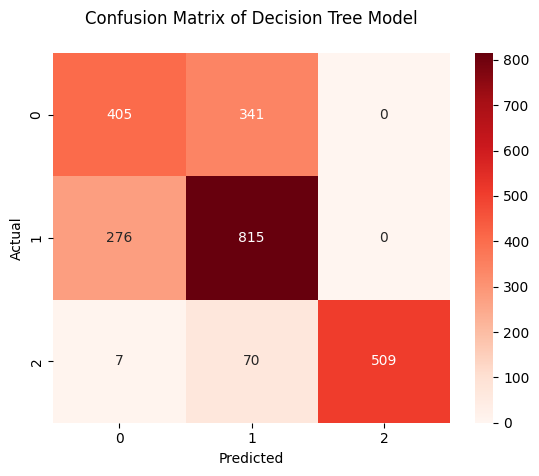

In [38]:
#Reference [Source #1]
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_confusion_matrix = confusion_matrix(dt_y_pred, y_test)

#Performance metrics (Accuracy e.t.c)

sns.heatmap(dt_confusion_matrix, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Decision Tree Model\n")
plt.show()

### 6.2 - Random Forest Algorithm Evaluation

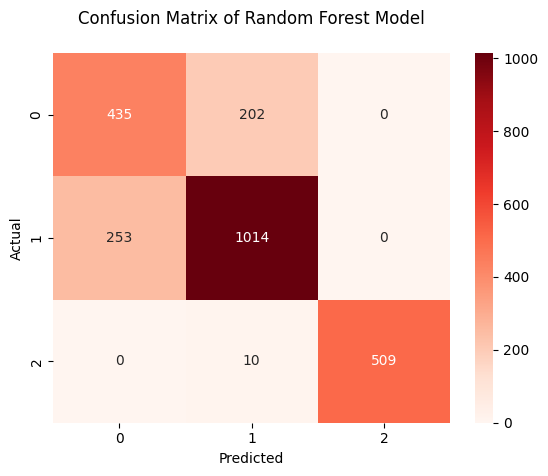

In [39]:
#Reference [Source #1]

rf_confusion_matrix = confusion_matrix(rf_y_pred, y_test)


sns.heatmap(rf_confusion_matrix, annot=True, cmap="Reds" , fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest Model\n")
plt.show()

### 6.3 - Naive Bayes ML Algorithm Evaluation.

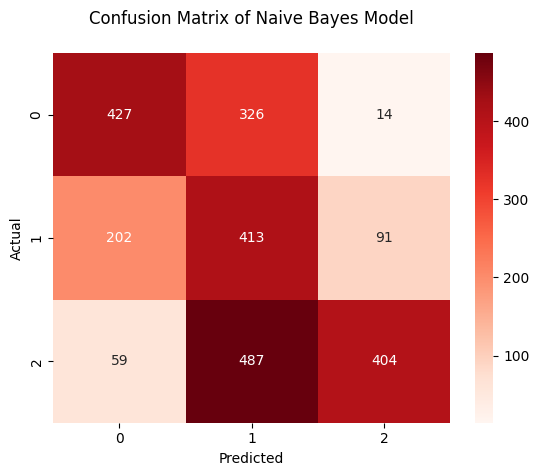

In [40]:
#Reference [Source #1]


nb_confusion_matrix = confusion_matrix(nb_y_pred, y_test)

sns.heatmap(nb_confusion_matrix, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Naive Bayes Model\n")


plt.show()

### 6.4 - SVM ML Algorithm Evaluation.

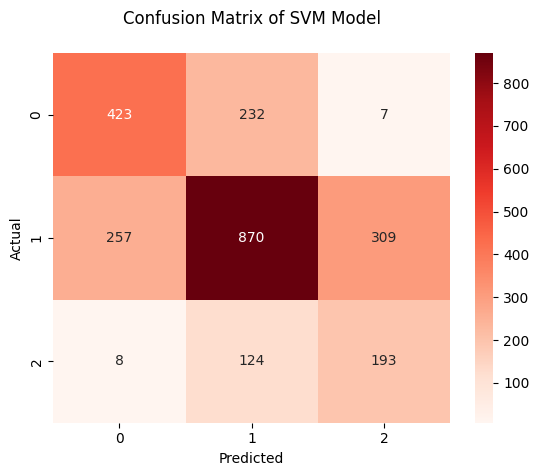

In [41]:
#Reference [Source #1]

svm_confusion_matrix = confusion_matrix(svm_y_pred, y_test)

sns.heatmap(svm_confusion_matrix, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of SVM Model\n")


plt.show()

### 6.5: K-NN Algorithm Evaluation.

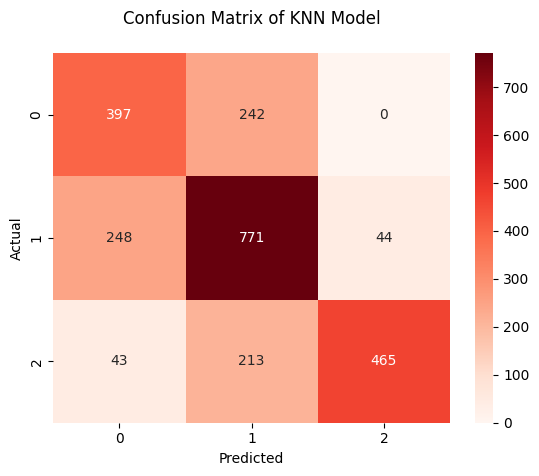

In [42]:
#Reference [Source #1]

knn_confusion_matrix = confusion_matrix(knn_y_pred, y_test)

sns.heatmap(knn_confusion_matrix, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of KNN Model\n")

plt.show()

# 7. Algorithm Perfomance Comparisons


### 7.1 Perfomance Comaprisons of all Algorithms.

In [43]:
#Reference [Source #1]

# Create an empty dictionary to store ROC curve data
roc_data = {}

# Iterate over models
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict probabilities on the test data
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Calculate AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Store ROC curve data in the dictionary
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["roc_auc"]:.2f})')

# Set labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Show the plot
plt.show()



NameError: name 'models' is not defined

# 8. Analysis


### 8.1 Analysis of all Algorithms.

In [ ]:
#Reference [Source #1]

knn_confusion_matrix = confusion_matrix(knn_y_pred, y_test)

sns.heatmap(knn_confusion_matrix, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of KNN Model\n")

plt.show()

### References:

1. Chatgpt (no date) ChatGPT. Available at: https://openai.com/chatgpt (Accessed: 25 October 2023).
2. https://youtu.be/HyoPxdSlbgg
3. https://scikit-learn.org/